# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

#Поставил тут random_state=42 чтобы на всякий случай данные не съезжали
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [19]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [20]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [21]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

В начале подерёс параметры которые лучше всего будут работать с `LogisticRegression` а именно начнём с параметра `solver`, так как дальше будем выбирать тип регуляризации, и если я правильно читаю документацию к логистическое регрессии, то:
> The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

Выбираем между 'saga' и 'lbfgs' так как Solver liblinear does not support a multinomial backend.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
solvers = ['saga', 'lbfgs']
for i in solvers:
    lr_clf = LogisticRegression(multi_class='multinomial', solver=i, max_iter = 8000)
    lr_clf.fit(X_train, y_train)
    prediction = lr_clf.predict(X_test)
    print('Accuracy for', i,' solver is:', accuracy_score(prediction, y_test))

Accuracy for saga  solver is: 0.7777777777777778
Accuracy for lbfgs  solver is: 0.8181818181818182


На данном этапе можно считать что solver = 'lbfgs' лучше, посмотрим что будет дальше с типами регуляризации.

__Посмотрим на скорррелированность признаков__

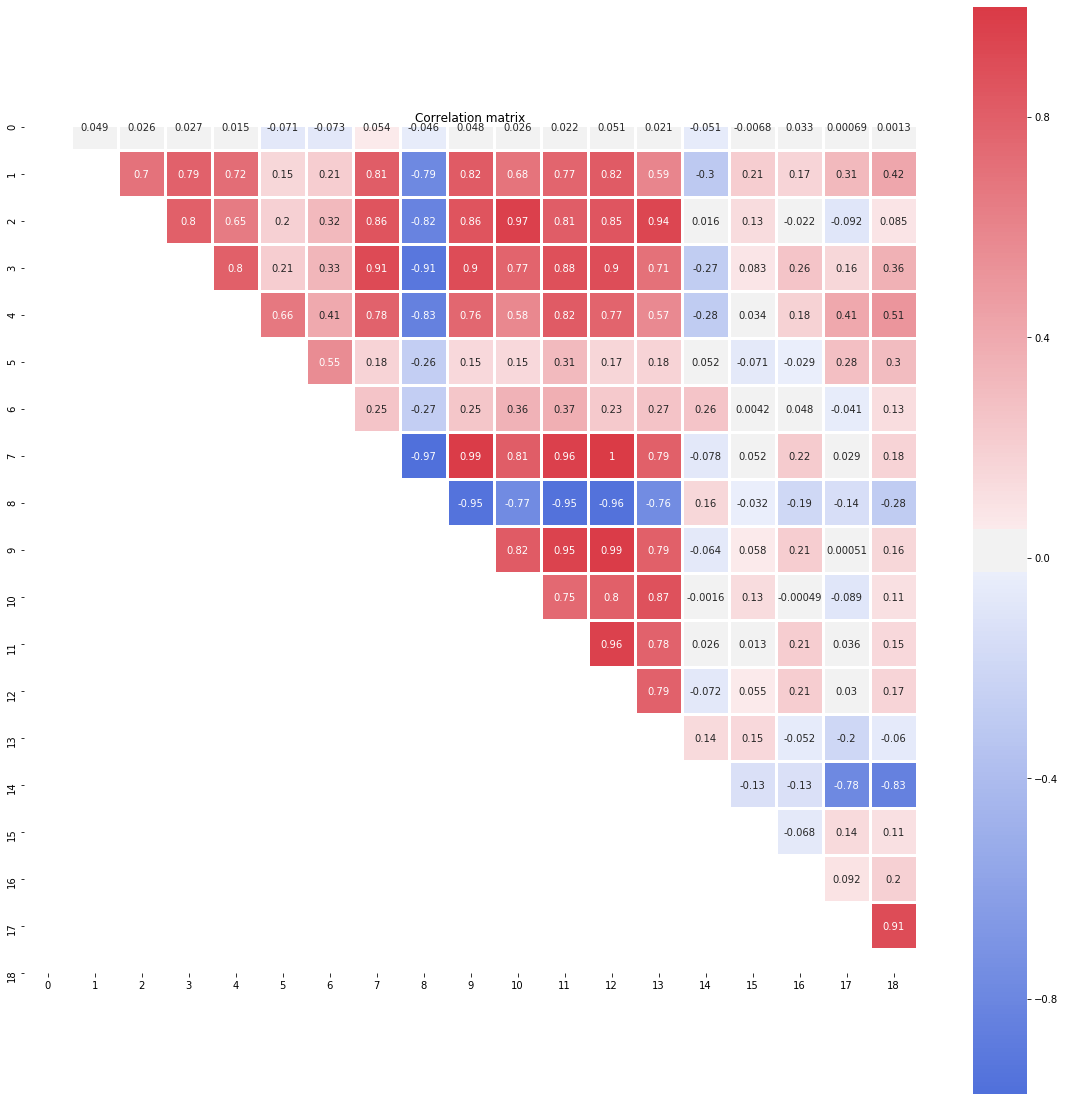

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = X_train_pd.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

data, ax = plt.subplots(figsize=(20, 20))
plt.title('Correlation matrix')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corr, vmax=1.0, square='square', cmap=cmap, mask=mask,
           ax=ax, annot=True, fmt='.2g', linewidths=2)

__Вывод:__ В данных присутсвует много сильно скоррелированных признаков. Если взять что то из курса эконометрики то это говорит о том что часть данных может быть лишними и часть может быть опущено для получения более точных результатов. Таким образом модель построенная на такого типа данных не будет самой лучшей.

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (не переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

Воспользуемся `GridSearchCV` для нахождения лучшего типа регуляризации при solver='saga'. 

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Да, всё-таки будем проводить нормировку данных. Если честно, то на моих лично опытах в этой
#задаче Accuracy не сильно вырос, но график объяснённой дисперсии был намного лучше. Да и в целом это не так плохо.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_clf = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=8000)
penalty = ['l1',  'l2']
c = np.linspace(0.01, 1, 10)
hyperparameters = dict(penalty=penalty, C=c)
clf = GridSearchCV(lr_clf, hyperparameters, scoring = 'accuracy', n_jobs = -1, iid='False', cv = 5)
best_clf = clf.fit(X_train, y_train)
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [25]:
best_lr_clf = LogisticRegression(best_clf.best_estimator_.get_params()['penalty'], C=best_clf.best_estimator_.get_params()['C'],
                                 solver='saga', multi_class='multinomial', max_iter = 8000)
best_lr_clf.fit(X_train, y_train)
prediction = best_lr_clf.predict(X_test)
print('Accuracy for ', best_clf.best_estimator_.get_params()['penalty'], 
      ' regularization and saga solver in "best" LogisticRegression model: ', accuracy_score(prediction, y_test))
print('Weighted F1_score for our model: ', f1_score(prediction, y_test, average='weighted'))

Accuracy for  l1  regularization and saga solver in "best" LogisticRegression model:  0.8013468013468014
Weighted F1_score for our model:  0.8070999577039482


Воспользуемся `scikitplot.metrics.plot_roc` для многоклассовой классификации с использованием лучших параметров подобранной логистической регрессии.

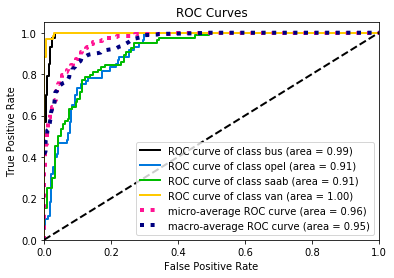

In [26]:
#Построение графика ROC кривой
import scikitplot as skplt
from sklearn.metrics import f1_score
%matplotlib inline

y_probas = best_lr_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [27]:
#Аккуратно посмотрели а с чем имеем дело
set(target)

{'bus', 'opel', 'saab', 'van'}

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

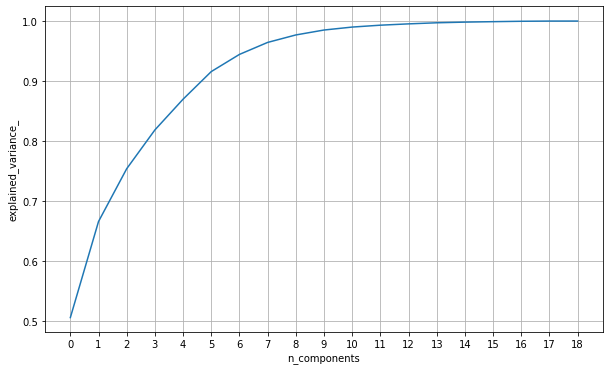

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.xticks(range(0,20))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

В теории параметр n_component можно брать в случае объяснения 95% накопленной дисперсии.

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

__Ответ:__ Пока предположительно выберем число компонент больше 8 (исходя из графика в пункте 2.2), так как при 8 и более компонентах будет объясняться более 95% значения вариации. Пока попробуем поработать с GridSearchCV, вдруг он выдаст оптимально число и посмотрим на Accuracy. По крайней мере так делали где то на официальной странице документации.

Но всё же n_components мы найдём при помощи GridSearchCV.

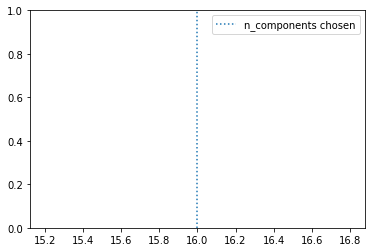

In [29]:
from sklearn.pipeline import Pipeline

pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', best_lr_clf)])
n_components = range(1,20)
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components),
                        n_jobs=-1, iid='False', cv=5)
estimator.fit(X_train, y_train)
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend()
plt.show()

In [30]:
### YOUR CODE HERE
pca = PCA(n_components=estimator.best_estimator_.named_steps['pca'].n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

best_lr_clf.fit(X_train_pca, y_train)
prediction = best_lr_clf.predict(X_test_pca)

print('Accuracy ', accuracy_score(y_test, prediction))

Accuracy  0.5723905723905723


Но всё таки проверим для 8 и 11 компонент.

In [31]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

best_lr_clf.fit(X_train_pca, y_train)
prediction = best_lr_clf.predict(X_test_pca)

print('Accuracy for 8 components', accuracy_score(y_test, prediction))

pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

best_lr_clf.fit(X_train_pca, y_train)
prediction = best_lr_clf.predict(X_test_pca)

print('Accuracy for 11 components', accuracy_score(y_test, prediction))

Accuracy for 8 components 0.5185185185185185
Accuracy for 11 components 0.531986531986532


__В общем и целом критиковать модель по Accuracy тут не имеет смысла, так как модель на имеющихся коэфицентах не лучшая. Таким образом нужно просто брать n_jobs больше 8. В работе остановоюсь на 12.__

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [32]:
#Сделаем PCA для 12 компонент
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

clf = GridSearchCV(lr_clf, hyperparameters, scoring = 'accuracy', n_jobs = -1, iid='False', cv = 5)
best_clf = clf.fit(X_train_pca, y_train)
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.78


In [33]:
best_lr_clf_pca = LogisticRegression(best_clf.best_estimator_.get_params()['penalty'], C=best_clf.best_estimator_.get_params()['C'],
                                 solver='saga', multi_class='multinomial', max_iter = 8000)
best_lr_clf_pca.fit(X_train_pca, y_train)
prediction = best_lr_clf_pca.predict(X_test_pca)
print('Accuracy for ', best_clf.best_estimator_.get_params()['penalty'], 
      ' regularization and saga solver in "best" LogisticRegression model: ', accuracy_score(prediction, y_test))
print('Weighted F1_score for our model: ', f1_score(prediction, y_test, average='weighted'))

Accuracy for  l2  regularization and saga solver in "best" LogisticRegression model:  0.5218855218855218
Weighted F1_score for our model:  0.5154934069182228


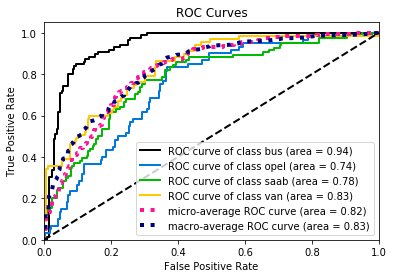

In [34]:
y_probas = best_lr_clf_pca.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_cl = DecisionTreeClassifier(random_state=42)
tree_para = {'criterion':['gini', 'entropy'], 'max_depth':range(3,50)}

clf = GridSearchCV(dt_cl, tree_para, n_jobs=-1, iid='True', cv=5)
grid_tr = clf.fit(X_train, y_train)
grid_tr.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [36]:
best_tr_clf = dt_cl.set_params(**grid_tr.best_params_)
best_tr_clf.fit(X_train, y_train)
prediction_dt = best_tr_clf.predict(X_test)
print('The accuracy of the "best" Decision Tree is', accuracy_score(prediction_dt, y_test))
print('Weighted F1_score for our model: ', f1_score(prediction_dt, y_test, average='weighted'))

The accuracy of the "best" Decision Tree is 0.7037037037037037
Weighted F1_score for our model:  0.7082326112228275


#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

Построим графики для зависимости Accuracy от числа алгоритмов в ансамбле.

__Ансамбль линейных моделей (логистическая регрессия)__

In [37]:
from sklearn.ensemble import BaggingClassifier

scores = np.array([])

for n_estimators in range(2, 51):
    bg_clf = BaggingClassifier(base_estimator=best_lr_clf, n_estimators=n_estimators,
                               bootstrap=True, n_jobs=-1)
    bg_clf.fit(X_train, y_train)
    score = accuracy_score(y_test, bg_clf.predict(X_test))
    scores = np.append(scores, score)

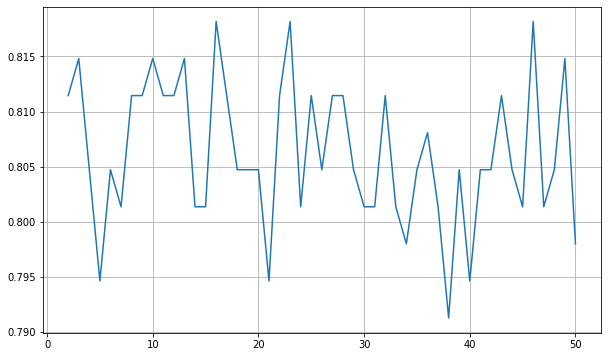

In [38]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.arange(2, 51), scores)
plt.grid()
plt.show()

__Ансамбль решающих деревьев__

In [39]:
scores = np.array([])

for n_estimators in range(2, 51):
    bg_clf = BaggingClassifier(base_estimator=best_tr_clf, n_estimators=n_estimators,
                               bootstrap=True, n_jobs=-1)
    bg_clf.fit(X_train, y_train)
    score = accuracy_score(y_test, bg_clf.predict(X_test))
    scores = np.append(scores, score)

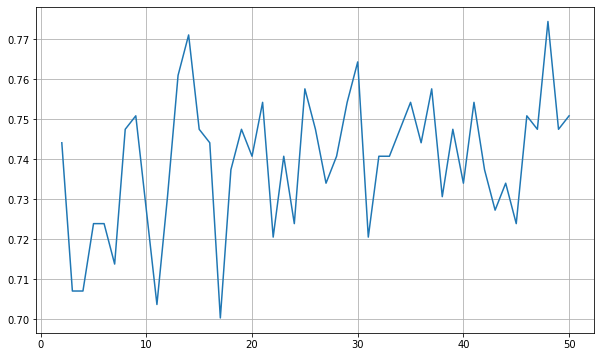

In [40]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.arange(2, 51), scores)
plt.grid()
plt.show()

__Выводы:__ При работе с ансамблями оказалось сложно выбрать количество моделей. Результат неустойчив, хотя и есть выбросы по более высоким значениям Accuracy.

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [41]:
from sklearn.ensemble import RandomForestClassifier

means = np.array([])
stds = np.array([])

for n_estimators in range(1, 51):
    scores = np.array([])
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, n_jobs=-1)
    for i in range(50):
        rf_clf.fit(X_train, y_train)
        score = accuracy_score(y_test, rf_clf.predict(X_test))
        scores = np.append(scores, score)
    means = np.append(means, scores.mean())
    stds = np.append(stds, scores.std())

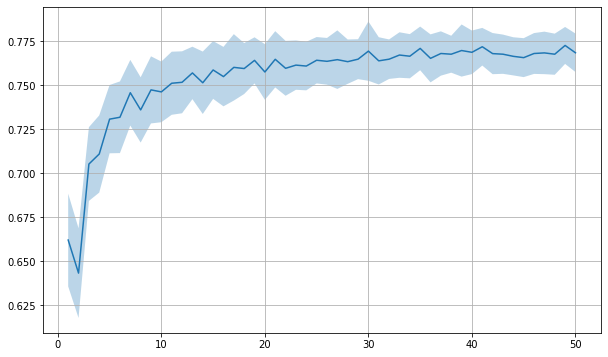

In [42]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.arange(1, 51), means)
ax.fill_between(np.arange(1, 51), means - stds, means + stds, alpha=0.3)
plt.grid()
plt.show()

Оптимальное число деревьев - около 18 и более.

Сравнивать с прошлым пунктом не совсем корректно ввиду неустойчивых, плохих результатов в пункте 2.6.

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [43]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

part = int(X_train.shape[0] / 10)
indices = np.arange(part, X_train.shape[0] - part, part)

X_train_list = np.split(X_train, indices)
y_train_list = np.split(y_train, indices)

In [44]:
acc_scores_lr = np.array([])
f1_scores_lr = np.array([])

acc_scores_tree = np.array([])
f1_scores_tree = np.array([])

acc_scores_bg_lr = np.array([])
f1_scores_bg_lr = np.array([])

acc_scores_bg_tree = np.array([])
f1_scores_bg_tree = np.array([])

acc_scores_rf = np.array([])
f1_scores_rf = np.array([])

for n_parts in range(10):
    X_train_part = np.concatenate(X_train_list[0:n_parts+1])
    y_train_part = np.concatenate(y_train_list[0:n_parts+1])
    
    best_lr_clf.fit(X_train_part, y_train_part)
    y_pred = best_lr_clf.predict(X_test)
    acc_scores_lr = np.append(acc_scores_lr, accuracy_score(y_test, y_pred))
    f1_scores_lr = np.append(f1_scores_lr, f1_score(y_test, y_pred, average='weighted'))
    
    best_tr_clf.fit(X_train_part, y_train_part)
    y_pred = best_tr_clf.predict(X_test)
    acc_scores_tree = np.append(acc_scores_tree, accuracy_score(y_test, y_pred))
    f1_scores_tree = np.append(f1_scores_tree, f1_score(y_test, y_pred, average='weighted'))
    
    bg_clf = BaggingClassifier(base_estimator=best_lr_clf, n_estimators=20, \
                               bootstrap=True, n_jobs=-1)
    bg_clf.fit(X_train_part, y_train_part)
    y_pred = bg_clf.predict(X_test)
    acc_scores_bg_lr = np.append(acc_scores_bg_lr, accuracy_score(y_test, y_pred))
    f1_scores_bg_lr = np.append(f1_scores_bg_lr, f1_score(y_test, y_pred, average='weighted'))
    
    bg_clf = BaggingClassifier(base_estimator=best_tr_clf, n_estimators=20, \
                               bootstrap=True, n_jobs=-1)
    bg_clf.fit(X_train_part, y_train_part)
    y_pred = bg_clf.predict(X_test)
    acc_scores_bg_tree = np.append(acc_scores_bg_tree, accuracy_score(y_test, y_pred))
    f1_scores_bg_tree = np.append(f1_scores_bg_tree, f1_score(y_test, y_pred, average='weighted'))
    
    rf_clf.fit(X_train_part, y_train_part)
    y_pred = rf_clf.predict(X_test)
    acc_scores_rf = np.append(acc_scores_rf, accuracy_score(y_test, y_pred))
    f1_scores_rf = np.append(f1_scores_rf, f1_score(y_test, y_pred, average='weighted'))

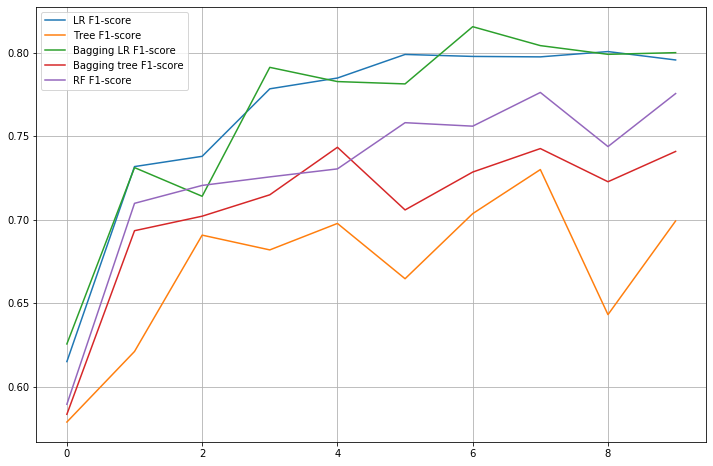

In [45]:
_ , ax = plt.subplots(figsize=(12, 8))

ax.plot(np.arange(10), f1_scores_lr, label='LR F1-score')
ax.plot(np.arange(10), f1_scores_tree, label='Tree F1-score')
ax.plot(np.arange(10), f1_scores_bg_lr, label='Bagging LR F1-score')
ax.plot(np.arange(10), f1_scores_bg_tree, label='Bagging tree F1-score')
ax.plot(np.arange(10), f1_scores_rf, label='RF F1-score')

ax.grid()
ax.legend()
plt.show()

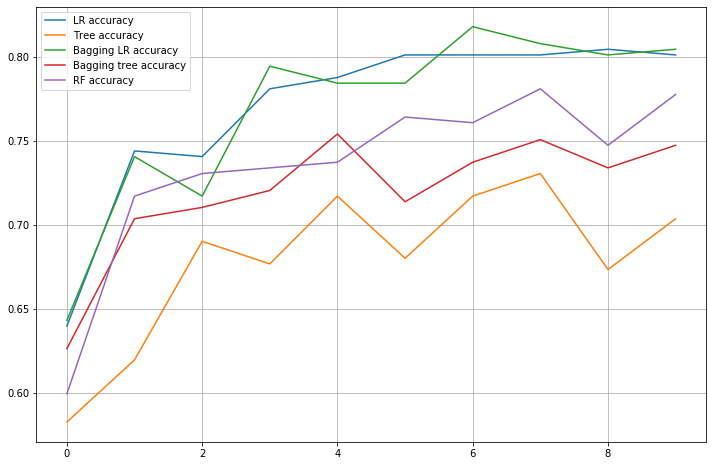

In [46]:
_ , ax = plt.subplots(figsize=(12, 8))

ax.plot(np.arange(10), acc_scores_lr, label='LR accuracy')
ax.plot(np.arange(10), acc_scores_tree, label='Tree accuracy')
ax.plot(np.arange(10), acc_scores_bg_lr, label='Bagging LR accuracy')
ax.plot(np.arange(10), acc_scores_bg_tree, label='Bagging tree accuracy')
ax.plot(np.arange(10), acc_scores_rf, label='RF accuracy')

ax.grid()
ax.legend()
plt.show()

__Выводы:__ Вообще довольно странный график. Интересно есть ли ошибка с учётом того что мой pca над логистической регрессией был не очень?
По графику можно сказать что линейные модели и bagging с ними всегда сильно выигрывают.